In [49]:
import sqlite3

In [50]:
conn=sqlite3.connect(r'C:\Users\Adi\Desktop\Data science project\dallas-ois.sqlite')

In [51]:
cursor=conn.cursor()

In [52]:
cursor.execute("SELECT name FROM sqlite_master WHERE type='table' ORDER BY name")

In [54]:
cursor.fetchall()

[]

to get description of table


In [55]:
cursor.execute("PRAGMA table_info(incidents)").fetchall()

[(0, 'case_number', 'TEXT', 0, None, 0),
 (1, 'date', 'DATE', 0, None, 0),
 (2, 'location', 'TEXT', 0, None, 0),
 (3, 'subject_statuses', 'TEXT', 0, None, 0),
 (4, 'subject_weapon', 'TEXT', 0, None, 0),
 (5, 'subjects', 'TEXT', 0, None, 0),
 (6, 'subject_count', 'INTEGER', 0, None, 0),
 (7, 'officers', 'TEXT', 0, None, 0),
 (8, 'officer_count', 'INTEGER', 0, None, 0),
 (9, 'grand_jury_disposition', 'TEXT', 0, None, 0),
 (10, 'attorney_general_forms_url', 'TEXT', 0, None, 0),
 (11, 'summary_url', 'TEXT', 0, None, 0),
 (12, 'summary_text', 'TEXT', 0, None, 0),
 (13, 'latitude', 'FLOAT', 0, None, 0),
 (14, 'longitude', 'FLOAT', 0, None, 0)]

In [56]:
cursor.execute("PRAGMA table_info(officers)").fetchall()

[(0, 'case_number', 'TEXT', 0, None, 0),
 (1, 'race', 'TEXT', 0, None, 0),
 (2, 'gender', 'TEXT', 0, None, 0),
 (3, 'last_name', 'TEXT', 0, None, 0),
 (4, 'first_name', 'TEXT', 0, None, 0),
 (5, 'full_name', 'TEXT', 0, None, 0)]

In [63]:
cursor.execute("PRAGMA table_info(subjects)").fetchall()

[(0, 'case_number', 'TEXT', 0, None, 0),
 (1, 'race', 'TEXT', 0, None, 0),
 (2, 'gender', 'TEXT', 0, None, 0),
 (3, 'last_name', 'TEXT', 0, None, 0),
 (4, 'first_name', 'TEXT', 0, None, 0),
 (5, 'full_name', 'TEXT', 0, None, 0)]

In [64]:
#get all data from table 
officers=pd.read_sql('SELECT*FROM officers',conn)

In [65]:
officers.head()

,case_number,race,gender,last_name,first_name,full_name
0,44523A,L,M,Patino,Michael,"Patino, Michael"
1,44523A,W,M,Fillingim,Brian,"Fillingim, Brian"
2,121982X,L,M,Padilla,Gilbert,"Padilla, Gilbert"
3,605484T,W,M,Poston,Jerry,"Poston, Jerry"
4,384832T,B,M,Mondy,Michael,"Mondy, Michael"


In [67]:
officers.head()

,case_number,race,gender,last_name,first_name,full_name
0,44523A,L,M,Patino,Michael,"Patino, Michael"
1,44523A,W,M,Fillingim,Brian,"Fillingim, Brian"
2,121982X,L,M,Padilla,Gilbert,"Padilla, Gilbert"
3,605484T,W,M,Poston,Jerry,"Poston, Jerry"
4,384832T,B,M,Mondy,Michael,"Mondy, Michael"


In [68]:
#same dta in both columns 
officers=pd.read_sql('SELECT*FROM officers JOIN incidents ON officers.case_number=incidents.case_number',conn)

In [69]:
officers.head()

,case_number,race,gender,last_name,first_name,full_name,case_number,date,location,subject_statuses,...,subjects,subject_count,officers,officer_count,grand_jury_disposition,attorney_general_forms_url,summary_url,summary_text,latitude,longitude
0,44523A,L,M,Patino,Michael,"Patino, Michael",44523A,2013-02-23,3000 Chihuahua Street,Injured,...,"Curry, James L/M",1,"Patino, Michael L/M; Fillingim, Brian W/M",2,No Bill,None,http://dallaspolice.net/reports/OIS/narrative/...,"On Saturday, February 23, 2013, at approximate...",NaN,NaN
1,44523A,W,M,Fillingim,Brian,"Fillingim, Brian",44523A,2013-02-23,3000 Chihuahua Street,Injured,...,"Curry, James L/M",1,"Patino, Michael L/M; Fillingim, Brian W/M",2,No Bill,None,http://dallaspolice.net/reports/OIS/narrative/...,"On Saturday, February 23, 2013, at approximate...",NaN,NaN
2,121982X,L,M,Padilla,Gilbert,"Padilla, Gilbert",121982X,2010-05-03,1300 N. Munger Boulevard,Injured,...,"Chavez, Gabriel L/M",1,"Padilla, Gilbert L/M",1,No Bill,None,http://dallaspolice.net/reports/OIS/narrative/...,"On Monday, May 3, 2010, at approximately 8:06 ...",NaN,NaN
3,605484T,W,M,Poston,Jerry,"Poston, Jerry",605484T,2007-08-12,200 S. Stemmons Freeway,Other,...,"Salinas, Nick L/M",1,"Poston, Jerry W/M",1,See Summary,None,http://dallaspolice.net/reports/OIS/narrative/...,"On Sunday, August 12, 2007, at approximately 2...",NaN,NaN
4,384832T,B,M,Mondy,Michael,"Mondy, Michael",384832T,2007-05-26,7900 S. Loop 12,Shoot and Miss,...,"Smith, James B/M; Dews, Antonio B/M; Spearman,...",3,"Mondy, Michael B/M",1,None,None,http://dallaspolice.net/reports/OIS/narrative/...,"On Saturday, May 26, 2007, at approximately 1:...",NaN,NaN


In [74]:
incidents=pd.read_sql('SELECT*FROM incidents',conn)

In [75]:
incidents.head()

,case_number,date,location,subject_statuses,subject_weapon,subjects,subject_count,officers,officer_count,grand_jury_disposition,attorney_general_forms_url,summary_url,summary_text,latitude,longitude
0,44523A,2013-02-23,3000 Chihuahua Street,Injured,Handgun,"Curry, James L/M",1,"Patino, Michael L/M; Fillingim, Brian W/M",2,No Bill,None,http://dallaspolice.net/reports/OIS/narrative/...,"On Saturday, February 23, 2013, at approximate...",NaN,NaN
1,121982X,2010-05-03,1300 N. Munger Boulevard,Injured,Handgun,"Chavez, Gabriel L/M",1,"Padilla, Gilbert L/M",1,No Bill,None,http://dallaspolice.net/reports/OIS/narrative/...,"On Monday, May 3, 2010, at approximately 8:06 ...",NaN,NaN
2,605484T,2007-08-12,200 S. Stemmons Freeway,Other,Shotgun,"Salinas, Nick L/M",1,"Poston, Jerry W/M",1,See Summary,None,http://dallaspolice.net/reports/OIS/narrative/...,"On Sunday, August 12, 2007, at approximately 2...",NaN,NaN
3,384832T,2007-05-26,7900 S. Loop 12,Shoot and Miss,Unarmed,"Smith, James B/M; Dews, Antonio B/M; Spearman,...",3,"Mondy, Michael B/M",1,None,None,http://dallaspolice.net/reports/OIS/narrative/...,"On Saturday, May 26, 2007, at approximately 1:...",NaN,NaN
4,244659R,2006-04-03,6512 South Loop 12,Injured,Hands,"Watkins, Caleb B/M",1,"Armstrong, Michael W/M",1,No Bill,None,http://dallaspolice.net/reports/OIS/narrative/...,"On Monday, April 3, 2006, at approximately 11:...",NaN,NaN


In [77]:
incidents.shape

(219, 15)

In [78]:
subjects=pd.read_sql('SELECT*FROM subjects',conn)

In [80]:
subjects.shape

(223, 6)

In [82]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [83]:
conn=sqlite3.connect(r'C:\Users\Adi\Desktop\Data science project\dallas-ois.sqlite')

In [84]:
incidents=pd.read_sql('SELECT*FROM incidents',conn)
officers=pd.read_sql('SELECT*FROM officers',conn)
subjects=pd.read_sql('SELECT*FROM subjects',conn)

In [85]:
len(incidents),len(officers),len(subjects)

(219, 370, 223)

In [86]:
incidents.head()

,case_number,date,location,subject_statuses,subject_weapon,subjects,subject_count,officers,officer_count,grand_jury_disposition,attorney_general_forms_url,summary_url,summary_text,latitude,longitude
0,44523A,2013-02-23,3000 Chihuahua Street,Injured,Handgun,"Curry, James L/M",1,"Patino, Michael L/M; Fillingim, Brian W/M",2,No Bill,None,http://dallaspolice.net/reports/OIS/narrative/...,"On Saturday, February 23, 2013, at approximate...",NaN,NaN
1,121982X,2010-05-03,1300 N. Munger Boulevard,Injured,Handgun,"Chavez, Gabriel L/M",1,"Padilla, Gilbert L/M",1,No Bill,None,http://dallaspolice.net/reports/OIS/narrative/...,"On Monday, May 3, 2010, at approximately 8:06 ...",NaN,NaN
2,605484T,2007-08-12,200 S. Stemmons Freeway,Other,Shotgun,"Salinas, Nick L/M",1,"Poston, Jerry W/M",1,See Summary,None,http://dallaspolice.net/reports/OIS/narrative/...,"On Sunday, August 12, 2007, at approximately 2...",NaN,NaN
3,384832T,2007-05-26,7900 S. Loop 12,Shoot and Miss,Unarmed,"Smith, James B/M; Dews, Antonio B/M; Spearman,...",3,"Mondy, Michael B/M",1,None,None,http://dallaspolice.net/reports/OIS/narrative/...,"On Saturday, May 26, 2007, at approximately 1:...",NaN,NaN
4,244659R,2006-04-03,6512 South Loop 12,Injured,Hands,"Watkins, Caleb B/M",1,"Armstrong, Michael W/M",1,No Bill,None,http://dallaspolice.net/reports/OIS/narrative/...,"On Monday, April 3, 2006, at approximately 11:...",NaN,NaN


In [87]:
subjects_incidents=pd.read_sql('SELECT*FROM subjects JOIN incidents ON subjects.case_number=incidents.case_number',conn)

In [88]:
len(subjects_incidents)

223

In [89]:
subjects_incidents.head()

,case_number,race,gender,last_name,first_name,full_name,case_number,date,location,subject_statuses,...,subjects,subject_count,officers,officer_count,grand_jury_disposition,attorney_general_forms_url,summary_url,summary_text,latitude,longitude
0,44523A,L,M,Curry,James,"Curry, James",44523A,2013-02-23,3000 Chihuahua Street,Injured,...,"Curry, James L/M",1,"Patino, Michael L/M; Fillingim, Brian W/M",2,No Bill,None,http://dallaspolice.net/reports/OIS/narrative/...,"On Saturday, February 23, 2013, at approximate...",NaN,NaN
1,121982X,L,M,Chavez,Gabriel,"Chavez, Gabriel",121982X,2010-05-03,1300 N. Munger Boulevard,Injured,...,"Chavez, Gabriel L/M",1,"Padilla, Gilbert L/M",1,No Bill,None,http://dallaspolice.net/reports/OIS/narrative/...,"On Monday, May 3, 2010, at approximately 8:06 ...",NaN,NaN
2,605484T,L,M,Salinas,Nick,"Salinas, Nick",605484T,2007-08-12,200 S. Stemmons Freeway,Other,...,"Salinas, Nick L/M",1,"Poston, Jerry W/M",1,See Summary,None,http://dallaspolice.net/reports/OIS/narrative/...,"On Sunday, August 12, 2007, at approximately 2...",NaN,NaN
3,384832T,B,M,Smith,James,"Smith, James",384832T,2007-05-26,7900 S. Loop 12,Shoot and Miss,...,"Smith, James B/M; Dews, Antonio B/M; Spearman,...",3,"Mondy, Michael B/M",1,None,None,http://dallaspolice.net/reports/OIS/narrative/...,"On Saturday, May 26, 2007, at approximately 1:...",NaN,NaN
4,384832T,B,M,Dews,Antonio,"Dews, Antonio",384832T,2007-05-26,7900 S. Loop 12,Shoot and Miss,...,"Smith, James B/M; Dews, Antonio B/M; Spearman,...",3,"Mondy, Michael B/M",1,None,None,http://dallaspolice.net/reports/OIS/narrative/...,"On Saturday, May 26, 2007, at approximately 1:...",NaN,NaN


In [90]:
subjects_incidents.dtypes

case_number                    object
race                           object
gender                         object
last_name                      object
first_name                     object
full_name                      object
case_number                    object
date                           object
location                       object
subject_statuses               object
subject_weapon                 object
subjects                       object
subject_count                   int64
officers                       object
officer_count                   int64
grand_jury_disposition         object
attorney_general_forms_url     object
summary_url                    object
summary_text                   object
latitude                      float64
longitude                     float64
dtype: object

In [91]:
subjects_incidents.isna().sum()

case_number                     0
race                            0
gender                          0
last_name                       0
first_name                     18
full_name                       0
case_number                     0
date                            0
location                        0
subject_statuses                0
subject_weapon                  0
subjects                        0
subject_count                   0
officers                        0
officer_count                   0
grand_jury_disposition         88
attorney_general_forms_url    221
summary_url                     3
summary_text                    3
latitude                        9
longitude                       9
dtype: int64

In [97]:
subjects_incidents.groupby('subject_statuses').count()

,case_number,race,gender,last_name,first_name,full_name,case_number,date,location,subject_weapon,subjects,subject_count,officers,officer_count,grand_jury_disposition,attorney_general_forms_url,summary_url,summary_text,latitude,longitude
subject_statuses,,,,,,,,,,,,,,,,,,,,
1 Deceased 1 Injured,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,0,2,2,2,2
2 Injured,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1
Deceased,69,69,69,69,67,69,69,69,69,69,69,69,69,69,67,1,67,67,68,68
Deceased Injured,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,0,2,2,2,2
Injured,60,60,60,60,60,60,60,60,60,60,60,60,60,60,58,1,60,60,57,57
Other,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,0,2,2,1,1
Shoot and Miss,87,87,87,87,71,87,87,87,87,87,87,87,87,87,4,0,86,86,83,83


In [185]:
subjects_incidents.groupby('race').count()

,case_number,gender,last_name,first_name,full_name,case_number,date,location,subject_statuses,subject_weapon,subjects,subject_count,officers,officer_count,grand_jury_disposition,attorney_general_forms_url,summary_url,summary_text,latitude,longitude
race,,,,,,,,,,,,,,,,,,,,
A,2,2,2,2,2,2,2,2,2,2,2,2,2,2,0,0,2,2,2,2
B,111,111,111,104,111,111,111,111,111,111,111,111,111,111,67,0,109,109,106,106
L,72,72,72,61,72,72,72,72,72,72,72,72,72,72,37,2,71,71,68,68
W,38,38,38,38,38,38,38,38,38,38,38,38,38,38,31,0,38,38,38,38


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

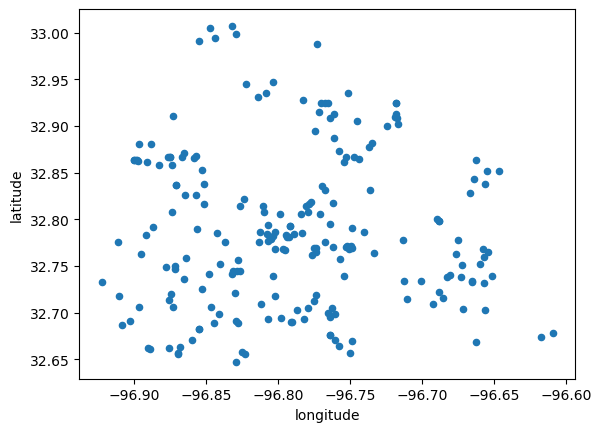

In [186]:
subjects_incidents.plot.scatter(x='longitude',y='latitude')

In [187]:
#we added dropna to remove missing data
datasets=subjects_incidents[['race','subject_statuses','latitude','longitude']].dropna()

In [188]:
datasets.head()

,race,subject_statuses,latitude,longitude
9,L,Deceased,32.68642,-96.908674
10,B,Deceased,32.86400,-96.898998
11,W,Shoot and Miss,32.81482,-96.826787
12,B,Injured,32.77540,-96.767489
13,B,Shoot and Miss,32.74417,-96.828470


In [189]:
len(datasets)

214

In [190]:
mapping={'B':'b','W':'y','A':'r','L':'g'}

In [191]:
datasets['race']=datasets['race'].apply(lambda x:mapping[x])

In [193]:
datasets.head()

,race,subject_statuses,latitude,longitude
9,g,Deceased,32.68642,-96.908674
10,b,Deceased,32.86400,-96.898998
11,y,Shoot and Miss,32.81482,-96.826787
12,b,Injured,32.77540,-96.767489
13,b,Shoot and Miss,32.74417,-96.828470


In [194]:
mapping={'Deceased':1000,'Injured':500,'Shoot and Miss':250}

In [195]:
datasets['subject_statuses']=datasets['subject_statuses'].apply(lambda x:mapping.get(x,100))

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

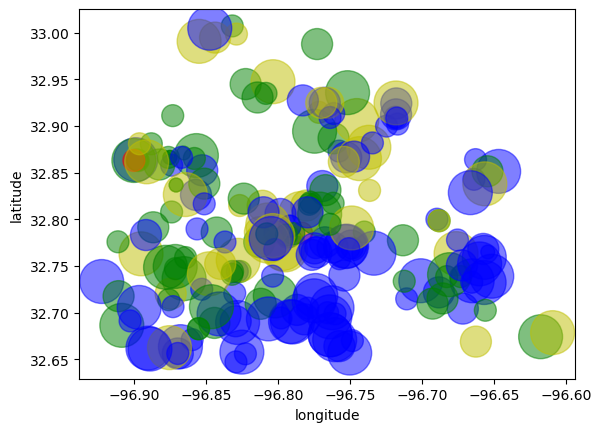

In [168]:
datasets.plot.scatter(x='longitude',y='latitude',s='subject_statuses',c='race',alpha=.5)

<AxesSubplot:title={'center':'dallas shootings'}, xlabel='latitude', ylabel='longitude'>

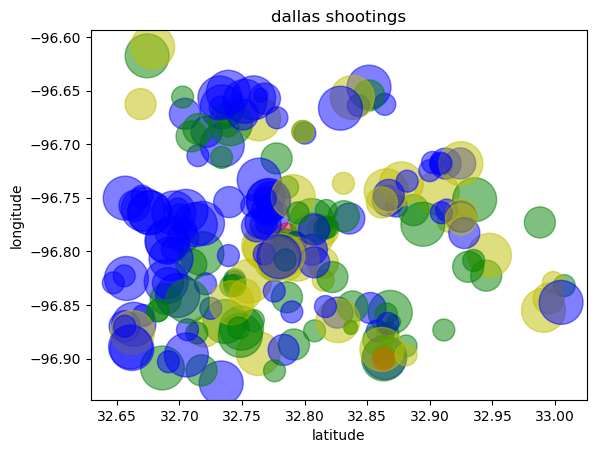

In [196]:
datasets.plot.scatter(x='latitude',y='longitude',s='subject_statuses',c='race',alpha=.5,title='dallas shootings')

In [215]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [216]:
import folium

In [217]:
m=folium.Map(location=[32.8,-96.8])

m

In [218]:
m

In [219]:
for _, row in datasets.iterrows():
   folium.CircleMarker(
       location=[row['latitude'],row['longitude']],
       radious=row['subject_statuses']//100,
       color=row['race'],
       fill=True,
       fill_color=row['race']
   ).add_to(m)

In [214]:
m